In [10]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display
import sklearn
print(sklearn.__version__)
#如果只有 0.19 記得要更新至 最新版本
%matplotlib inline


#顯示所有行
pd.set_option('display.max_columns', None)
#顯示所有列
pd.set_option('display.max_rows', None)
#顯示行設定
pd.set_option('max_colwidth',100)

import pingouin as pg
import researchpy   
 

0.24.1


In [11]:
df_train = pd.read_csv("Titanic_train.csv")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [12]:
#1.產稱一個新的變數 Survived_cate ，資料型態傳換成類別型態    
#2.把題目中的 Survived 用 Survived_cate 來做分析 
df_train['Survived_cate']=df_train['Survived']
df_train['Survived_cate']=df_train['Survived_cate'].astype('object')
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  Survived_cate  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
None


In [13]:
#我們先把遺失值刪除
## 取出資料後，把遺失值刪除
complete_data=df_train[['Age','Survived_cate','Sex']].dropna()
complete_data.head(3)

,Age,Survived_cate,Sex
0,22.0,0,male
1,38.0,1,female
2,26.0,1,female


In [14]:
# Q1: 產生一個新的變數(Age_above65_) Age>=65為 'Y'，其餘為'N'。
def age_did_above65(y):
    return y >= 65 and'Y'or 'N'
complete_data['Age_above65_'] = complete_data['Age'].apply(age_did_above65)
display(complete_data)

,Age,Survived_cate,Sex,Age_above65_
0,22.00,0,male,N
1,38.00,1,female,N
2,26.00,1,female,N
3,35.00,1,female,N
4,35.00,0,male,N
6,54.00,0,male,N
7,2.00,0,male,N
8,27.00,1,female,N
9,14.00,1,female,N
10,4.00,1,female,N


In [15]:
# Q2: 添加女性和男性，產生一個新的變數(Age_above65_female)，女性或Age>=65為'Y'，其餘為'N'。
# 暗示: 觀看下面影片找答案，https://www.youtube.com/watch?v=X2d-wUt5azY
# gender_mapping={'male':1,'female':2}
# complete_data['gender_id'] = complete_data['Sex'].map(gender_mapping)
def applyTrainData(data):
    return ((data['Age_above65_']== 'Y' or data['Sex'] == 'female')) and 'Y' or 'N'

complete_data['Age_above65_female'] = complete_data.apply(applyTrainData, axis = 1)
complete_data.head(3)

,Age,Survived_cate,Sex,Age_above65_,Age_above65_female
0,22.0,0,male,N,N
1,38.0,1,female,N,Y
2,26.0,1,female,N,Y


In [16]:
contTable1 = pd.crosstab(complete_data['Survived_cate'], complete_data['Age_above65_female'])
contTable1

Age_above65_female,N,Y
Survived_cate,,
0,350,74
1,92,198


Cramer's 相關性0.080 結果 Negligible 微乎其微


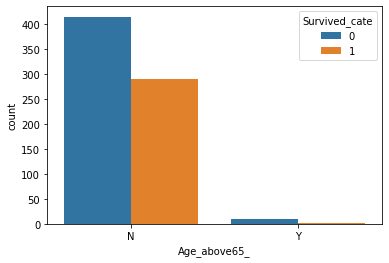

In [17]:
# Q3: 透過昨天課程的內容，驗證產生的兩個新變數，哪一個和目標變數(Survived_cate)的相關性較高?
# 提示: 首先觀察一下這些變數的資料型態後，再來想要以哪一種判斷倆倆的相關性。
def judgment_CramerV(df,V):
    if df == 1:
        if V < 0.10:
            qual = 'Negligible 微乎其微'
        elif V < 0.30:
            qual = 'Small 小有關聯'
        elif V < 0.50:
            qual = 'Medium 有關係但影響不大'
        else:
            qual = 'Large 非常相關'
    elif df == 2:
        if V < 0.07:
            qual = 'Negligible 微乎其微'
        elif V < 0.21:
            qual = 'Small 小有關聯'
        elif V < 0.35:
            qual = 'Medium 有關係但影響不大'
        else:
            qual = 'Large 非常相關'
    elif df == 3:
        if V < 0.06:
            qual = 'Negligible 微乎其微'
        elif V < 0.17:
            qual = 'Small 小有關聯'
        elif V < 0.29:
            qual = 'Medium 有關係但影響不大'
        else:
            qual = 'Large 非常相關'
    elif df == 4:
        if V < 0.05:
            qual = 'Negligible 微乎其微'
        elif V < 0.15:
            qual = 'Small 小有關聯'
        elif V < 0.25:
            qual = 'Medium 有關係但影響不大'
        else:
            qual = 'Large 非常相關'
    else:
        if V < 0.05:
            qual = 'Negligible 微乎其微'
        elif V < 0.13:
            qual = 'Small 小有關聯'
        elif V < 0.22:
            qual = 'Medium 有關係但影響不大'
        else:
            qual = 'Large 非常相關'
    return(qual)

def exeCramers(data, target, relative):
    cont = pd.crosstab(data[relative], data[target])
    df = min(cont.shape[0], cont.shape[1]) - 1
    crosstab, res = researchpy.crosstab(data[relative], data[target], test='chi-square')
    print("Cramer's 相關性%.3f 結果 %s" % (res.loc[2,'results'], judgment_CramerV(df, res.loc[2,'results'])))
    g = sns.countplot(x = relative, hue = target, data = data)
exeCramers(complete_data, 'Survived_cate', 'Age_above65_')

Cramer's 相關性0.514 結果 Large 非常相關


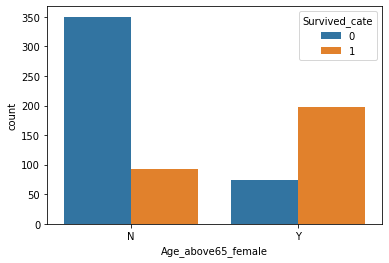

In [18]:
exeCramers(complete_data, 'Survived_cate', 'Age_above65_female')